# Описание проекта

Аналитика компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Необходимо сделать предварительный анализ тарифов на небольшой выборке клиентов. В распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов


Тариф «Смарт»

 1. Ежемесячная плата: 550 рублей
 2. Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
 3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.


Тариф «Ультра»

1. Ежемесячная плата: 1950 рублей
2. Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3. Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.


Примечание:

«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.

Шаг 1. Открытие файла с данными и изучение общей информации

In [ ]:
# общая распаковка всех датасетов
import pandas as pd

calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv')
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [2]:
# вывод первых и последних строк таблицы calls, первые данные о содержимом таблицы
display(calls.head())
display(calls.tail())
print('Пропуски в таблице calls:') 
print(calls.isna().sum())
print()
print('Всего уникальных пользователей (user_id):', len(calls['user_id'].unique()))
print()
print('Самые активные пользователи, user_id - количество звонков(записей)')
print(calls['user_id'].value_counts())
print()
print()
print('Общая информация о таблице')
print()
calls.info()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


,id,call_date,duration,user_id
202602,1499_215,2018-12-26,0.76,1499
202603,1499_216,2018-10-18,18.83,1499
202604,1499_217,2018-11-10,10.81,1499
202605,1499_218,2018-10-06,4.27,1499
202606,1499_219,2018-12-14,19.62,1499


Пропуски в таблице calls:
id           0
call_date    0
duration     0
user_id      0
dtype: int64

Всего уникальных пользователей (user_id): 492

Самые активные пользователи, user_id - количество звонков(записей)
1377    1760
1168    1692
1375    1560
1453    1440
1196    1240
        ... 
1397      33
1442      28
1373      24
1016      20
1257      14
Name: user_id, Length: 492, dtype: int64


Общая информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Датасет calls (информация о звонках):

Датасет содержит 202607 строк, 4 столбца.

•	id — уникальный номер звонка; тип данных - object

•	call_date — дата звонка; тип данных - object, 
формат записи даты: год-месяц-день

•	duration — длительность звонка в минутах; тип данных - float64

•	user_id — идентификатор пользователя, сделавшего звонок; тип данных - int64.

   Всего 492 уникальных пользователя.
   
   Исходя из вывода верха и низа таблицы, видно, что нумерация не сплошная, есть пропуски, т.е., из 500 пользователей звонки совершали 492 клиента (492 уникальных id), 8 клиентов не пользовались звонками. 
   При этом, часть клиентов пользовалась звонками значительно (на два порядка) чаще других. Например, пользователь № 1377 совершил 1760 звонков, тогда, как пользователь № 1257 совершил только  14 звонков.

Пропусков в таблице на этом этапе не обнаружено. 

Максимальная длительность звонка в минутах: 38.0

Минимальная длительность звонка в минутах: 0.0

Средняя длительность звонка в минутах: 6.755887210214849


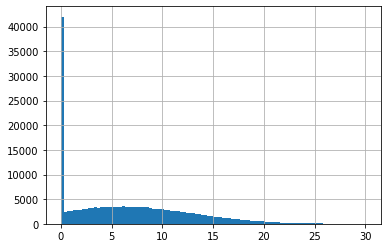

In [3]:
# данные о длительности звонков
print('Максимальная длительность звонка в минутах:', calls['duration'].max())
print()
print('Минимальная длительность звонка в минутах:', calls['duration'].min())
print()
print('Средняя длительность звонка в минутах:', calls['duration'].mean())
calls['duration'].hist(bins = 100, range = (0, 30))

Верхняя граница значений в минутах, выше которой значения признаются выбросами: 24.799999999999997


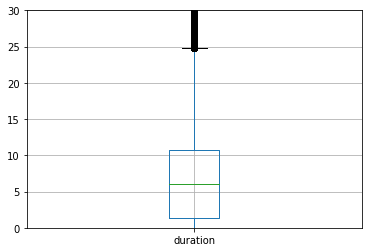

In [4]:
# определение границы выбросов
import matplotlib.pyplot as plt 

calls.boxplot('duration')
plt.ylim(0, 30)

# рассчёт верхней границы выбросов значений столбца duration
q1 = calls['duration'].quantile(0.25)
q3 = calls['duration'].quantile(0.75)
iqr = q3 - q1  
print('Верхняя граница значений в минутах, выше которой значения признаются выбросами:', (q3 + 1.5 * iqr))

Количество звонков длительностью 0 минут: 39613
Количество звонков, длительность которых более 24,8 минуты: 743


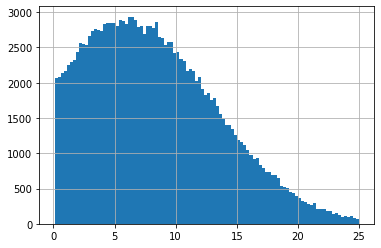

In [5]:
# сверхкороткие звонки не дают увидеть картину в целом
# рассмотрим крайние значения подробнее и гистограмму без звонков, длительностью 0 минут
calls['duration'].hist(bins = 100, range = (0.1, 25))
print('Количество звонков длительностью 0 минут:', 
      len(calls.loc[calls['duration']== 0]))
print('Количество звонков, длительность которых более 24,8 минуты:', 
      len(calls.loc[calls['duration'] > 24.8]))

************* Данные таблицы CALLS

Таблица содержит данные о звонках, длительностью 0 минут. Таких звонков значительное количество - 39613 звонков, что составляет 19,6% всех звонков.

Также, таблица содержит данные о необычно длительных звонках, более 24,8 минут, максимальная длительность звонка составляет 38 минут. С точки зрения диаграммы распределения, такие значения длительности звонков являются выбросами. Необычно длинных звонков - 743, что составляет 0,37% всех звонков.

Распределение промежуточных значений длительности звонков (более нуля минут до 25 минут) нормальное, гистограмма имеет колоколообразный вид с хвостом справа. Средняя длительность звонка составляет 6,8 минуты (медианное значение отличается от среднего незначительно), что соответствует максимуму на гистограмме. Гистограмма имеет сплошной равномерный вид, выпадающих значений и выделяющихся пиков нет.

In [6]:
# вывод первых и последних строк таблицы internet, первые данные о содержимом таблицы
display(internet.head())
display(internet.tail())
print('Пропуски в таблице internet:') 
print(internet.isna().sum())
print()
print('Всего уникальных пользователей (user_id):', len(internet['user_id'].unique()))
print()
print('Самые активные пользователи, user_id - количество интернет-сессий(записей)')
print(internet['user_id'].value_counts())
print()
print()
print('Общая информация о таблице')
print()
internet.info()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


,Unnamed: 0,id,mb_used,session_date,user_id
149391,149391,1499_152,318.90,2018-10-03,1499
149392,149392,1499_153,490.13,2018-12-14,1499
149393,149393,1499_154,0.00,2018-10-27,1499
149394,149394,1499_155,1246.32,2018-11-26,1499
149395,149395,1499_156,544.37,2018-10-26,1499


Пропуски в таблице internet:
Unnamed: 0      0
id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

Всего уникальных пользователей (user_id): 497

Самые активные пользователи, user_id - количество интернет-сессий(записей)
1496    834
1227    812
1204    789
1240    764
1251    759
       ... 
1151     35
1467     27
1343     26
1192     22
1399      8
Name: user_id, Length: 497, dtype: int64


Общая информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Датасет internet (информация об интернет-сессиях):

Датасет содержит 149396 строк, 5 столбцов.

•	id — уникальный номер сессии; тип данных - object

•	mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах);  тип данных - float64

•	session_date — дата интернет-сессии;  тип данных - object, формат записи даты: год-месяц-день

•	user_id — идентификатор пользователя;  тип данных - int64

Всего 497 уникальных пользователей.

Исходя из вывода верха и низа таблицы, видно, что нумерация не сплошная, есть пропуски, т.е., из 500 пользователей интернет-сессии были у 497 клиентов (497 уникальных id), 3 клиента не пользовались интернетом. При этом, часть клиентов пользовалась интернетом значительно (на два порядка) чаще других. Например, пользователь №1496 совершил 834 интернет-сессии, тогда, как пользователь № 1399 совершил только 8 интернет-сессий.

Таблица содержит столбец "Unnamed: 0" содержащий данные, не обозначенные в спецификации к проекту, содержащий объекты типа int64, и дублирующий значения индекса строки. Вероятно, столбец не имеет смысла, и подлежит удалению.

Пропусков в таблице на этом этапе не обнаружено.

Максимальное количество потреблённого трафика в мегабайтах: 1724.83

Минимальное количество потреблённого трафика в мегабайтах: 0.0

Среднее количество потреблённого трафика в мегабайтах: 370.1924263701839


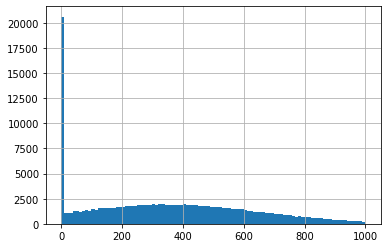

In [7]:
# данные об интернет-сессиях с точки зрения потреблённого трафика
print('Максимальное количество потреблённого трафика в мегабайтах:', internet['mb_used'].max())
print()
print('Минимальное количество потреблённого трафика в мегабайтах:', internet['mb_used'].min())
print()
print('Среднее количество потреблённого трафика в мегабайтах:', internet['mb_used'].mean())
internet['mb_used'].hist(bins = 100, range = (0, 1000))

Верхняя граница значений в мегабайтах, выше которой значения признаются выбросами: 1191.6


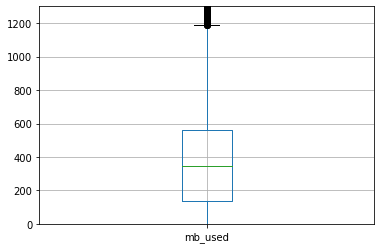

In [8]:
# определение границы выбросов

internet.boxplot('mb_used')
plt.ylim(0, 1300)

# рассчёт верхней границы выбросов значений столбца mb_used
q1 = internet['mb_used'].quantile(0.25)
q3 = internet['mb_used'].quantile(0.75)
iqr = q3 - q1  
print('Верхняя граница значений в мегабайтах, выше которой значения признаются выбросами:', 
      (q3 + 1.5 * iqr))

Количество интернет-сессий с потреблением трафика 0 мегабайт: 19598
Количество интернет-сессий с потреблением трафика более 1191.6 мегабайт: 543


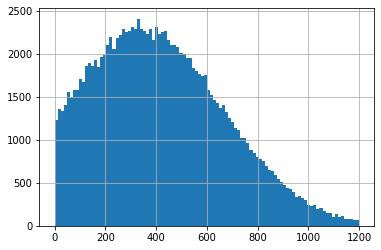

In [9]:
# визуализация данных без крайних значений
# данные о крайних значениях
internet['mb_used'].hist(bins = 100, range = (0.1, 1200))
print('Количество интернет-сессий с потреблением трафика 0 мегабайт:',
      len(internet.loc[internet['mb_used']== 0]))
print('Количество интернет-сессий с потреблением трафика более 1191.6 мегабайт:',
      len(internet.loc[internet['mb_used'] > 1191.6]))

***** Данные таблицы INTERNET

Таблица содержит данные об интернет-сессиях без потреблениях трафика (потреблённый трафик составляет ноль мегабайт). Таких интернет-сессий значительное количество - 19598, что составляет более 13,1% всех интернет-сессий.

Также, таблица содержит данные об интернет-сессиях с необычно большим потреблёнием трафика, более 1191.6 мегабайт, максимальное потребление трафика за одну интернет-сессию составляет 1724.83 мегабайт. С точки зрения диаграммы распределения, такие значения потреблённого трафика являются выбросами. Число интернет-сессий с необычно большим потреблённым трафиком - 543, что составляет 0,36% всех интернет-сессий.

Распределение промежуточных значений потреблённого трафика в интернет-сессиях (более нуля мегабайт до 1200 мегабайт) нормальное, гистограмма имеет колоколообразный вид с хвостом справа. Среднее потребление трафика составляет 370,2 мегабайта, что немного правее максимума на гистограмме (максимум соответствует медианному значению, около 350 мегабайт). Гистограмма имеет сплошной равномерный вид, выпадающих значений и выделяющихся пиков нет.

In [10]:
# вывод первых и последних строк таблицы calls, первые данные о содержимом таблицы
display(messages.head())
display(messages.tail())
print('Пропуски в таблице messages:') 
print(messages.isna().sum())
print()
print('Всего уникальных пользователей (user_id):', len(messages['user_id'].unique()))
print()
print('Самые активные пользователи, user_id - количество отправленных сообщений(записей)')
print(messages['user_id'].value_counts())
print()
print()
print('Общая информация о таблице')
print()
messages.info()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


,id,message_date,user_id
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


Пропуски в таблице messages:
id              0
message_date    0
user_id         0
dtype: int64

Всего уникальных пользователей (user_id): 426

Самые активные пользователи, user_id - количество отправленных сообщений(записей)
1277    1463
1089    1408
1231    1384
1385    1380
1356    1224
        ... 
1389       6
1279       5
1074       3
1159       2
1141       1
Name: user_id, Length: 426, dtype: int64


Общая информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Датасет messages (информация о сообщениях):

Датасет содержит 123036 строк, 3 столбца.

•	id — уникальный номер сообщения; тип данных - object

•	message_date — дата сообщения; тип данных - object, формат записи даты: год-месяц-день

•	user_id — идентификатор пользователя, отправившего сообщение; тип данных - int64.

Всего 426 уникальных пользователя.

Исходя из вывода верха и низа таблицы, видно, что нумерация не сплошная, есть довольно много пропусков, т.е., из 500 пользователей отправляли сообщения 426 клиентов (426 уникальных id), 74 клиента не пользовались отправкой сообщений. При этом, часть клиентов пользовалась отправкой сообщений значительно (на три с половиной порядка) чаще других. Например, пользователь №1277 отправил   1463  сообщения, тогда, как пользователь №1141 отправил всего 1 сообщение.

Пропусков в таблице на этом этапе не обнаружено.


Максимальное количество отправленных сообщений: 1463

Минимальное количество отправленных сообщений: 1

Среднее количество отправленных сообщений: 288.8169014084507


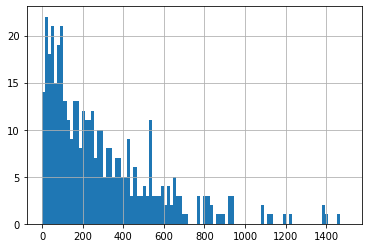

In [11]:
# данные о сообщениях
print('Максимальное количество отправленных сообщений:', messages['user_id'].value_counts().max())
print()
print('Минимальное количество отправленных сообщений:', messages['user_id'].value_counts().min())
print()
print('Среднее количество отправленных сообщений:', messages['user_id'].value_counts().mean())
messages['user_id'].value_counts().hist(bins = 100, range = (0, 1500))

Верхняя граница количества отправленных сообщений, выше которой значения признаются выбросами: 906.375


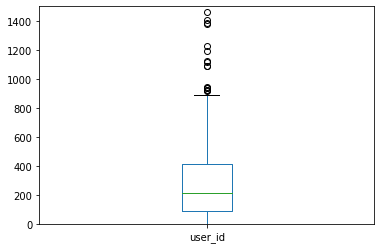

In [12]:
# определение границы выбросов

messages['user_id'].value_counts().plot.box()
plt.ylim(0, 1500)

# рассчёт верхней границы выбросов значений столбца mb_used
q1 = messages['user_id'].value_counts().quantile(0.25)
q3 = messages['user_id'].value_counts().quantile(0.75)
iqr = q3 - q1  
print('Верхняя граница количества отправленных сообщений, выше которой значения признаются выбросами:', 
      (q3 + 1.5 * iqr))

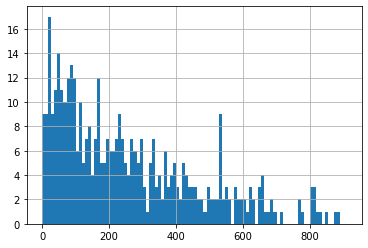

In [13]:
# визуализация данных без крайних значений
# данные о крайних значениях

messages['user_id'].value_counts().hist(bins = 100, range = (0, 910))

***** Данные таблицы MESSAGES

Таблица не содержит данных с нулевым количеством отправленных сообщений, т.е. малые значения адекватны. 

Судя по диаграмме "ящик с усами" таблица содержит данные о небольшом количестве пользователей, отправивших необычно много сообщений (более 907-ми сообщений), с точки зрения диаграммы распределения такие большие числа отправленных сообщений является выбросами. Максимальное число отправленных сообщений составляет 1463.

Распределение числа отправленных сообщений неровное, гистограмма имеет множество пиков и провалов, пилообразный вид, неравномерно убывающий с ростом значений. 

ПРОМЕЖУТОЧНЫЙ КОММЕНТАРИЙ ПО ТАБЛИЦАМ CALLS, INTERNET, MESSAGES

Все три таблицы составлены единообразным образом, не содержат пропусков, данные отвечают здравому смыслу.

Часть данных в таблицах неопределённой информативности: интернет-сессии с потреблённым трафиком 0 мегабайт; звонки, длительностью 0 минут; столбец Unnamed: 0 не имеющий информационной ценности.

Во всех трёх таблицах даты записаны в едином формате.

Кроме таблицы с сообщениями, данные по величинам распределены нормально.

Таблицы содержат данные, которые можно считать выбросами, но в задаче текущего проекта нет задачи избавляться от выбросов.


In [14]:
# вывод первых и последних строк таблицы users, первые данные о содержимом таблицы
display(users.head())
display(users.tail())
print('Пропуски в таблице users:') 
print(users.isna().sum())
print()
print('Всего уникальных пользователей (user_id):', len(users['user_id'].unique()))
print()
print()
print()
print('Общая информация о таблице')
print()
users.info()


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


Пропуски в таблице users:
user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

Всего уникальных пользователей (user_id): 500



Общая информация о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Датасет users (информация о пользователях):

Датасет содержит 500 строк, 8 столбцов.

•	user_id — уникальный идентификатор пользователя; тип данных - int64

•	first_name — имя пользователя; тип данных - object

•	last_name — фамилия пользователя; тип данных - object

•	age — возраст пользователя (годы); тип данных - int64

•	reg_date — дата подключения тарифа; тип данных - object, формат записи даты: год-месяц-день

•	churn_date — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных); тип данных - object

•	city — город проживания пользователя; тип данных - object

•	tariff — название тарифного плана; тип данных - object


Всего 500 уникальных пользователей.

В столбце churn_date обнаружено 462 пропуска. Исходя из описания данных в спецификации, каким-либо образом обрабатывать эти пропуски нет смысла.

In [15]:
# вывод таблицы tariffs
display(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Датасет tariffs (информация о тарифах):

•	tariff_name — название тарифа

•	rub_monthly_fee — ежемесячная абонентская плата в рублях

•	minutes_included — количество минут разговора в месяц, включённых в абонентскую плату

•	messages_included — количество сообщений в месяц, включённых в абонентскую плату

•	mb_per_month_included — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)

•	rub_per_minute — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)

•	rub_per_message — стоимость отправки сообщения сверх тарифного пакета

•	rub_per_gb — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)


Описание тарифов

Тариф «Смарт»
1.	Ежемесячная плата: 550 рублей
2.	Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета: 1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 2. сообщение: 3 рубля; 3. 1 Гб интернет-трафика: 200 рублей.

Тариф «Ультра»
1.	Ежемесячная плата: 1950 рублей
2.	Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
3.	Стоимость услуг сверх тарифного пакета: 1. минута разговора: 1 рубль; 2. сообщение: 1 рубль; 3. 1 Гб интернет-трафика: 150 рублей.

Примечание:
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта.




ШАГ 2. ПОДГОТОВКА ДАННЫХ

В соответствии с политикой «Мегалайн» округляю длительность телефонных звонков до целых минут, перевожу формат в целочисленный.

Таким же образом поступаю со значениями потреблённого интернет-трафика с последующим переводом в гигабайты.

Звонки, длительностью 0 минут - это пропущенные звонки, поэтому их не нужно удалять.

Интернет-сессии с потреблённым трафиком 0 мегабайт в таком случае не несут информации, величины не могут быть округлены, а значит, строки с этими данными будут удалены.

In [16]:
# создание столбца month - месяца в трёх таблицах
calls['month'] = pd.to_datetime(calls['call_date']).dt.month
display(calls.head())

internet['month'] = pd.to_datetime(internet['session_date']).dt.month
display(internet.head())

messages['month'] = pd.to_datetime(messages['message_date']).dt.month
display(messages.head())


,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,11
1,1,1000_1,1052.81,2018-09-07,1000,9
2,2,1000_2,1197.26,2018-06-25,1000,6
3,3,1000_3,550.27,2018-08-22,1000,8
4,4,1000_4,302.56,2018-09-24,1000,9


,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


In [17]:
# группировка данных таблиц по user_id и month и подсчёт суммарной искомой величины для каждого месяца
# для каждого клиента
calls = calls.groupby(['user_id', 'month']).agg({'duration': 'sum'}).reset_index()

internet = internet.groupby(['user_id', 'month']).agg({'mb_used': 'sum'}).reset_index()

messages = messages.groupby(['user_id', 'month']).agg({'id': 'count'})\
.rename(columns = {'id': 'messages'}).reset_index()

display(calls.head())
display(internet.head())
display(messages.head())

,user_id,month,duration
0,1000,5,150.06
1,1000,6,158.90
2,1000,7,318.80
3,1000,8,389.87
4,1000,9,440.14


,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


,user_id,month,messages
0,1000,5,22
1,1000,6,60
2,1000,7,75
3,1000,8,81
4,1000,9,57


In [18]:
# последовательное объединение четырёх таблиц
data = calls.merge(internet, on = ['user_id', 'month'], how = 'outer')
data = data.merge(messages, on = ['user_id', 'month'], how = 'outer')
data = data.merge(users, on = ['user_id'], how = 'outer')

data = data.merge(tariffs, left_on = ['tariff'], right_on = ['tariff_name'], how = 'outer')

data.info()
display(data.head(10))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
user_id                  3216 non-null int64
month                    3214 non-null float64
duration                 3174 non-null float64
mb_used                  3203 non-null float64
messages                 2717 non-null float64
age                      3216 non-null int64
churn_date               189 non-null object
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null object
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
tariff_name              

,user_id,month,duration,mb_used,messages,age,churn_date,city,first_name,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,1000,5.0,150.06,2253.49,22.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
1,1000,6.0,158.90,23233.77,60.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
2,1000,7.0,318.80,14003.64,75.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
3,1000,8.0,389.87,14055.93,81.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
4,1000,9.0,440.14,14568.91,57.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
5,1000,10.0,328.45,14702.49,73.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
6,1000,11.0,319.04,14756.47,58.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
7,1000,12.0,312.98,9817.61,70.0,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,ultra
8,1003,8.0,355.67,8565.21,37.0,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,ultra
9,1003,9.0,904.89,12468.87,91.0,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra,1000,30720,3000,1950,150,1,1,ultra


In [19]:
# для возможности дальнейшей обработки данных заменяю пропуски в значимых столбцах нулями
# замена нулями в этом случае не исказит результатов обработки данных
data['month'] = data['month'].fillna(0)
data['duration'] = data['duration'].fillna(0)
data['mb_used'] = data['mb_used'].fillna(0)
data['messages'] = data['messages'].fillna(0)

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3216 entries, 0 to 3215
Data columns (total 20 columns):
user_id                  3216 non-null int64
month                    3216 non-null float64
duration                 3216 non-null float64
mb_used                  3216 non-null float64
messages                 3216 non-null float64
age                      3216 non-null int64
churn_date               189 non-null object
city                     3216 non-null object
first_name               3216 non-null object
last_name                3216 non-null object
reg_date                 3216 non-null object
tariff                   3216 non-null object
messages_included        3216 non-null int64
mb_per_month_included    3216 non-null int64
minutes_included         3216 non-null int64
rub_monthly_fee          3216 non-null int64
rub_per_gb               3216 non-null int64
rub_per_message          3216 non-null int64
rub_per_minute           3216 non-null int64
tariff_name              

In [20]:
# функци по рассчёту перерасхода (недорасхода) основных ресуросов тарифных пакетов с последующим 
# округлением, в соответствии с примечаением Мегалайна, или обнулением 
# (в случае недорасхода ресурсов), и последующим расчётом стоимости оказанных услуг за каждую 
# услугу - выручка за звонки, трафик, смс + абонентская плата

import math 

def v_calls(row):
    extra_calls = math.ceil(row['duration'] - row['minutes_included'])
    vyruchka_calls = extra_calls * row['rub_per_minute']
    if vyruchka_calls < 0: vyruchka_calls = 0
    return vyruchka_calls

def v_internet(row):
    extra_gb_1 = ((row['mb_used'] - row['mb_per_month_included'])/1024)
    extra_gb = math.ceil(extra_gb_1)
    vyruchka_gb = extra_gb * row['rub_per_gb']
    if vyruchka_gb < 0: vyruchka_gb = 0
    return vyruchka_gb

def v_sms(row):
    vyruchka_sms = (row['messages'] - row['messages_included']) * row['rub_per_message']
    if vyruchka_sms < 0: vyruchka_sms = 0
    return vyruchka_sms

# внесение полученных данных (выручки) для каждого клиента в каждый месяц в единую таблицу
data['vyruchka_calls'] = data.apply(v_calls, axis = 1)
data['vyruchka_gb'] = data.apply(v_internet, axis = 1)
data['vyruchka_sms'] = data.apply(v_sms, axis = 1)

# расчёт общей выручки с каждого клиента в сумме
data['vyruchka'] = data['vyruchka_calls'] + data['vyruchka_gb'] + data['vyruchka_sms'] + data['rub_monthly_fee']

display(data.head())
display(data.tail(10))


,user_id,month,duration,mb_used,messages,age,churn_date,city,first_name,last_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,vyruchka_calls,vyruchka_gb,vyruchka_sms,vyruchka
0,1000,5.0,150.06,2253.49,22.0,52,NaN,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0,0,0.0,1950.0
1,1000,6.0,158.90,23233.77,60.0,52,NaN,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0,0,0.0,1950.0
2,1000,7.0,318.80,14003.64,75.0,52,NaN,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0,0,0.0,1950.0
3,1000,8.0,389.87,14055.93,81.0,52,NaN,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0,0,0.0,1950.0
4,1000,9.0,440.14,14568.91,57.0,52,NaN,Краснодар,Рафаил,Верещагин,...,3000,1950,150,1,1,ultra,0,0,0.0,1950.0


,user_id,month,duration,mb_used,messages,age,churn_date,city,first_name,last_name,...,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name,vyruchka_calls,vyruchka_gb,vyruchka_sms,vyruchka
3206,1499,9.0,64.65,1845.75,11.0,35,NaN,Пермь,Гектор,Корнилов,...,500,550,200,3,3,smart,0,0,0.0,550.0
3207,1499,10.0,429.91,17788.51,48.0,35,NaN,Пермь,Гектор,Корнилов,...,500,550,200,3,3,smart,0,600,0.0,1150.0
3208,1499,11.0,576.50,17963.31,59.0,35,NaN,Пермь,Гектор,Корнилов,...,500,550,200,3,3,smart,231,600,27.0,1408.0
3209,1499,12.0,465.16,13055.58,66.0,35,NaN,Пермь,Гектор,Корнилов,...,500,550,200,3,3,smart,0,0,48.0,598.0
3210,1489,8.0,0.00,11050.56,17.0,35,NaN,Санкт-Петербург,Павел,Гончаров,...,500,550,200,3,3,smart,0,0,0.0,550.0
3211,1489,9.0,0.00,17206.30,32.0,35,NaN,Санкт-Петербург,Павел,Гончаров,...,500,550,200,3,3,smart,0,400,0.0,950.0
3212,1489,10.0,0.00,19559.44,21.0,35,NaN,Санкт-Петербург,Павел,Гончаров,...,500,550,200,3,3,smart,0,1000,0.0,1550.0
3213,1489,11.0,0.00,17491.56,20.0,35,NaN,Санкт-Петербург,Павел,Гончаров,...,500,550,200,3,3,smart,0,600,0.0,1150.0
3214,1489,12.0,0.00,17322.51,35.0,35,NaN,Санкт-Петербург,Павел,Гончаров,...,500,550,200,3,3,smart,0,400,0.0,950.0
3215,1371,0.0,0.00,0.00,0.0,50,2018-12-30,Омск,Ириней,Трофимов,...,500,550,200,3,3,smart,0,0,0.0,550.0


Шаг 3. АНАЛИЗ ДАННЫХ

 Интернет-трафик

Среднее количество потреблённого интернет-трафика в мегабайтах пользователями тарифа "smart": 16201.118654708522


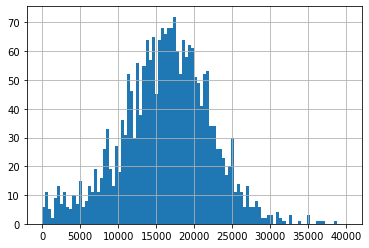

In [21]:
# данные об интернет-сессиях с точки зрения потреблённого трафика 
# тариф smart
print('Среднее количество потреблённого интернет-трафика в мегабайтах пользователями тарифа "smart":', 
      data.loc[data['tariff_name'] == 'smart', 'mb_used'].mean())
data.loc[data['tariff_name'] == 'smart', 'mb_used'].hist(bins = 100, range = (0, 40000))
      

In [22]:
# подсчёт дисперсии и стандартного отклонения
# тариф smart
import numpy as np

var_smart_mb = np.var(data.loc[data['tariff_name'] == 'smart', 'mb_used'])
std_smart_mb = var_smart_mb**0.5
print('Дисперсия величины потреблённого интернет-трафика потребителем \
тарифа "smart" составляет:') 
print(var_smart_mb)
print()
print('Стандартное отклонение величины потреблённого интернет-трафика потребителем \
тарифа "smart" составляет:')
print(std_smart_mb)


Дисперсия величины потреблённого интернет-трафика потребителем тарифа "smart" составляет:
34549343.55148492

Стандартное отклонение величины потреблённого интернет-трафика потребителем тарифа "smart" составляет:
5877.868963449672


Среднее количество потреблённого интернет-трафика в мегабайтах пользователями тарифа "ultra": 19449.059969574035



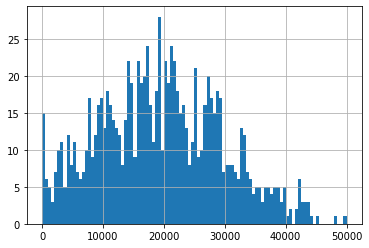

In [23]:
# данные об интернет-сессиях с точки зрения потреблённого трафика 
# тариф ultra
print('Среднее количество потреблённого интернет-трафика в мегабайтах пользователями тарифа "ultra":', 
      data.loc[data['tariff_name'] == 'ultra', 'mb_used'].mean())
print()
data.loc[data['tariff'] == 'ultra', 'mb_used'].hist(bins = 100, range = (0, 50000))


In [24]:
# подсчёт дисперсии и стандартного отклонения
# тариф ultra
var_ultra_mb = np.var(data.loc[data['tariff_name'] == 'ultra', 'mb_used'])
std_ultra_mb = var_ultra_mb**0.5
print('Дисперсия величины потреблённого интернет-трафика потребителем \
тарифа "ultra" составляет:') 
print(var_ultra_mb)
print()
print('Стандартное отклонение величины потреблённого интернет-трафика потребителем \
тарифа "ultra" составляет:')
print(std_ultra_mb)

Дисперсия величины потреблённого интернет-трафика потребителем тарифа "ultra" составляет:
101928648.60329504

Стандартное отклонение величины потреблённого интернет-трафика потребителем тарифа "ultra" составляет:
10095.971899886363


Анализ количества потреблённого интернет-трафика

   Пользователи тарифа smart в стреднем потребляли 16201 мегабайт трафика в месяц

   Дисперсия величины потреблённого интернет-трафика потребителем тарифа smart составляет:
34549343.
   Стандартное отклонение величины потреблённого интернет-трафика потребителем тарифа smart составляет: 5877 мегабайт


   Пользователи тарифа ultra в стреднем потребляли 19449 мегабайт трафика в месяц.
   Дисперсия величины потреблённого интернет-трафика потребителем тарифа ultra составляет:
101928648.
    Стандартное отклонение величины потреблённого интернет-трафика потребителем тарифа ultra составляет: 10096 мегабайт.


Гистограмма, отображающая количество потреблённого интернет-трафика пользователями тарифа smart выглядит более скученно, пик максимума более выражен по сравнению с гистораммой тарифа ultra. 

Стандартное отклонение величины потреблённого интернет-трафика потребителем тарифа ultra значительно больше аналогичной величины для тарифа smart. 
Такие результаты могут говорить о более свободном отношении клиента тарифа ultra к имеющимся в запасе ресурсе трафика, покупке им трафика "про запас". В подтверждение этой гипотезы говорит небольшая разница в средних показателях потреблённого трафика.


Телефонные звонки

Среднее количество минут телефонных разговоров, совершённых пользователями тарифа "smart": 394.2501524663677


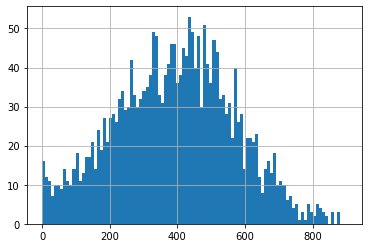

In [25]:
# данные о телефонных звонках
# тариф smart
print('Среднее количество минут телефонных разговоров, совершённых пользователями тарифа "smart":', 
      data.loc[data['tariff_name'] == 'smart', 'duration'].mean())
data.loc[data['tariff'] == 'smart', 'duration'].hist(bins = 100, range = (0, 900))

In [26]:
# подсчёт дисперсии и стандартного отклонения
# тариф smart
var_smart_calls = np.var(data.loc[data['tariff_name'] == 'smart', 'duration'])
std_smart_calls = var_smart_calls**0.5
print('Дисперсия количества потраченных минут телефонных разговоров потребителем \
тарифа "smart" составляет:') 
print(var_smart_calls)
print()
print('Стандартное отклонение количества потраченных минут телефонных разговоров потребителем \
тарифа "smart" составляет:')
print(std_smart_calls)

Дисперсия количества потраченных минут телефонных разговоров потребителем тарифа "smart" составляет:
32427.082132532803

Стандартное отклонение количества потраченных минут телефонных разговоров потребителем тарифа "smart" составляет:
180.07521243228564


Среднее количество минут телефонных разговоров, совершённых пользователями тарифа "ultra": 496.5640973630832


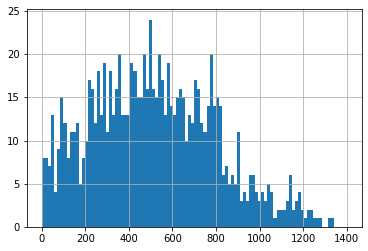

In [27]:
# данные о телефонных звонках
# тариф ultra
print('Среднее количество минут телефонных разговоров, совершённых пользователями тарифа "ultra":', 
      data.loc[data['tariff_name'] == 'ultra', 'duration'].mean())
data.loc[data['tariff'] == 'ultra', 'duration'].hist(bins = 100, range = (1, 1400))

In [28]:
# подсчёт дисперсии и стандартного отклонения
# тариф ultra
var_ultra_calls = np.var(data.loc[data['tariff_name'] == 'ultra', 'duration'])
std_ultra_calls = var_ultra_calls**0.5
print('Дисперсия количества потраченных минут телефонных разговоров потребителем \
тарифа "ultra" составляет:') 
print(var_ultra_calls)
print()
print('Стандартное отклонение количества потраченных минут телефонных разговоров потребителем \
тарифа "ultra" составляет:')
print(std_ultra_calls)

Дисперсия количества потраченных минут телефонных разговоров потребителем тарифа "ultra" составляет:
90010.39208645704

Стандартное отклонение количества потраченных минут телефонных разговоров потребителем тарифа "ultra" составляет:
300.01731964414495


Анализ количества потраченных минут телефонных звонков

   Пользователи тарифа smart в стреднем потратили 394 минуты телефонных переговоров в месяц
   
   Дисперсия количества потраченных минут телефонных разговоров потребителем тарифа smart составляет: 32427

   Стандартное отклонение количества потраченных минут телефонных разговоров потребителем тарифа smart составляет: 180 минут



   Пользователи тарифа ultra в стреднем потратили 497 минут телефонных переговоров в месяц

   Дисперсия количества потраченных минут телефонных разговоров потребителем тарифа ultra составляет: 90010

   Стандартное отклонение количества потраченных минут телефонных разговоров потребителем тарифа ultra составляет: 300 минут



Гистограмма, отображающая количество  потраченных минут телефонных звонков пользователями тарифа smart выглядит немного более скученно, хвост справа менее выражен по сравнению с гистораммой тарифа ultra.
Стандартное отклонение величины потраченных минут телефонных разговоров потребителем тарифа ultra значительно больше аналогичной величины для тарифа smart, и больше разницы в средних величинах. Результаты аналогичны данным по интернет-трафику: возможно более свободное отношение клиента тарифа ultra к имеющимся в запасе ресурсе доступных минут телефонных разговоров, покупке им телефонных минут "про запас". 

Текстовые сообщения

Среднее количество сообщений, отправленных пользователями тарифа "smart": 33.36905829596412


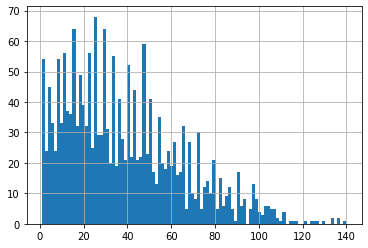

In [29]:
# данные о текстовых сообщениях
# тариф smart
print('Среднее количество сообщений, отправленных пользователями тарифа "smart":', 
      data.loc[data['tariff_name'] == 'smart', 'messages'].mean())
data.loc[data['tariff'] == 'smart', 'messages'].hist(bins = 100, range = (1, 140))

In [30]:
# подсчёт дисперсии и стандартного отклонения
# тариф smart
var_smart_sms = np.var(data.loc[data['tariff_name'] == 'smart', 'messages'])
std_smart_sms = var_smart_sms**0.5
print('Дисперсия количества отправленных сообщений потребителем \
тарифа "smart" составляет:') 
print(var_smart_sms)
print()
print('Стандартное отклонение количества отправленных сообщений потребителем \
тарифа "smart" составляет:')
print(std_smart_sms)

Дисперсия количества отправленных сообщений потребителем тарифа "smart" составляет:
796.5978766916688

Стандартное отклонение количества отправленных сообщений потребителем тарифа "smart" составляет:
28.224065559229217


Среднее количество сообщений, отправленных пользователями тарифа "ultra": 49.31338742393509


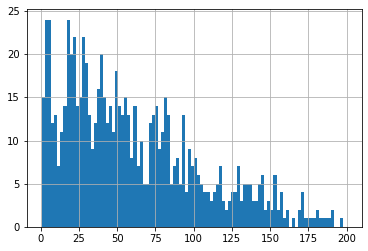

In [31]:
# данные о текстовых сообщениях
# тариф ultra
print('Среднее количество сообщений, отправленных пользователями тарифа "ultra":', 
      data.loc[data['tariff_name'] == 'ultra', 'messages'].mean())
data.loc[data['tariff'] == 'ultra', 'messages'].hist(bins = 100, range = (1, 200))

In [32]:
# подсчёт дисперсии и стандартного отклонения
# тариф ultra
var_ultra_sms = np.var(data.loc[data['tariff_name'] == 'ultra', 'messages'])
std_ultra_sms = var_ultra_sms**0.5
print('Дисперсия количества отправленных сообщений потребителем \
тарифа "ultra" составляет:') 
print(var_ultra_sms)
print()
print('Стандартное отклонение количества отправленных сообщений потребителем \
тарифа "ultra" составляет:')
print(std_ultra_sms)

Дисперсия количества отправленных сообщений потребителем тарифа "ultra" составляет:
2283.0995570851965

Стандартное отклонение количества отправленных сообщений потребителем тарифа "ultra" составляет:
47.781791061922284


Анализ количества отправленных текстовых сообщений


   Пользователи тарифа smart в среднем отправляли 33 сообщения в месяц
   
   Дисперсия количества отправленных сообщений потребителем тарифа smart составляет:
797

   Стандартное отклонение количества отправленных сообщений потребителем тарифа smart составляет:
28 сообщений



   Пользователи тарифа ultra в стреднем отправляли 49 сообщения в месяц
   
   Дисперсия количества отправленных сообщений потребителем тарифа ultra составляет:
2283

   Стандартное отклонение количества отправленных сообщений потребителем тарифа ultra составляет:
48 сообщений


Гистограммы для обоих тарифов имеют схожий вид - ниспадающий пилообразный график без явного максимума с большой амплитудой значений (множеством пиков и провалов).

Данные по отправленным сообщениям аналогичны данным для интернет-трафика и потраченных минут телефонных разговоров. Стандартное отклонение количества отправленных сообщений потребителем тарифа ultra практически равно средней величине отправленных сообщений клиентами того же тарифа, что является очень большим разбросом. 

На основе этих данных и данных по интернет-трафику и телефонным звонкам можно сделать предположение  о покупке тарифа ultra "на всякий случай", "про запас".


ШАГ 4. ПРОВЕРКА ГИПОТЕЗ


•	Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.

•	Средняя выручка пользователей из Москвы равна средней выручке от пользователей из других городов.


Проверка гипотез будет осуществлена статистическим способом, методом scipy.stats.ttest_ind (array1, array2, equal_var).

Выбор проверки гипотез обусловлен тем, что в исследовании участвуют две генеральных совокупности, совокупности независимы, количественно близки (количество строк каждой совокупности одного порядка).

Плюс к указанному, будет проведён прямой расчёт средних величин для наглядности и контроля автоматического (скрытого) рассчёта. 

In [33]:
# расчёт средней выручки для обоих тарифов

print('Средняя выручка с клиента тарифа "smart":', 
      data.loc[data['tariff_name'] == 'smart', 'vyruchka'].mean())

print('Средняя выручка с клиента тарифа "ultra":', 
      data.loc[data['tariff_name'] == 'ultra', 'vyruchka'].mean())

Средняя выручка с клиента тарифа "smart": 1257.2713004484306
Средняя выручка с клиента тарифа "ultra": 2070.030425963489


In [34]:
# проверка гипотезы о равенстве средней выручки пользователей тарифов «Ультра» и «Смарт»
from scipy import stats as st

alpha = 0.05

smart_vyr =  data.loc[data['tariff_name'] == 'smart', 'vyruchka']

ultra_vyr = data.loc[data['tariff_name'] == 'ultra', 'vyruchka']

results = st.ttest_ind(smart_vyr, ultra_vyr)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение:  8.22236342276661e-179
Отвергаем нулевую гипотезу


Расчёт средних значений выручек пользователей тарифов «Ультра» и «Смарт» очевидно говорит, что средняя выручка различается.

К такому же выводу можно прийти путём проведения статистического теста.

Гипотеза о равенстве выручек пользователей тарифов «Ультра» и «Смарт» отвергнута.

In [35]:
# расчёт средней выручки для обоих тарифов

print('Средняя выручка с клиентов из Москвы:', 
      data.loc[data['city'] == 'Москва', 'vyruchka'].mean())

print('Средняя выручка с клиентов не из Москвы / из других городов:', 
      data.loc[data['city'] != 'Москва', 'vyruchka'].mean()) 
   

Средняя выручка с клиентов из Москвы: 1526.8379705400982
Средняя выручка с клиентов не из Москвы / из других городов: 1501.6763915547026


In [36]:
# проверка гипотезы о равенстве средней выручки пользователей из Москвы и других городов

alpha = 0.05

moscow_vyr =  data.loc[data['city'] == 'Москва', 'vyruchka']

nomoscow_vyr = data.loc[data['city'] != 'Москва', 'vyruchka']

results = st.ttest_ind(moscow_vyr, nomoscow_vyr)

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение:  0.4802219795713344
Не получилось отвергнуть нулевую гипотезу


Расчёт средних значений выручек пользователей из Москвы и других городов не даёт однозначного ответа.

Статистический тест даёт ответ, что средние значения выручек пользователей из Москвы и других городов не отличаются.

Гипотезу о равенстве выручек пользователей из Москвы и выручки от пользователей из других регионов отвергнуть не получилось.


ОБЩИЙ ВЫВОД

•	Исходные таблицы содержат данные о полученных пользователями услугах компании "Мегалайн": потраченные минуты телефонных разговоров, интернет-трафике, отправленных сообщениях. Таблицы содержат информацию о пользователях двух тарифных планах "Smart" и "Ultra", различающихся объёмом предоставляемых услуг. 

•	Данные в таблицы собраны за различные временные промежутки времени, что может объяснять большие отличия в объёмах потреблённых услуг (разница до трёх с половиной порядков). Получающиеся значения можно было бы считать выбросами, если бы данные были нормированы по определённому отрезку времени. Судя по построенным гистограммам для исходных данных необъединённых таблиц, данных, собранных за резко отличающийся промежуток времни, не большое количество, т.к. гистограммы имеют колоколообразный вид, а хвост справа имеет небольшую величину по частоте.

•	Для обработки данных было необходимо объединить все исходные таблицы в единую таблицу. При объединении образовалось некоторое количество пропусков в столбцах, с обрабатываемыми данными. Эти пропуски были заполнены нулями, т.к. такое заполнение не могло исказить результат обработки. Данные столбца churn_date в текущем проекте не рассматриваются, поэтому пропуски этого столбца не заполнялись.

•	Исходя из результатов анализа данных можно сделать следующие выводы:
- пользователи тарифа "Smart" покупают телеком-услуги для их целевого использования, т.е. предполагая ежемесячный объём потребляемых услуг;
- пользователи тарифа "Ultra" используют телеком-услуги нецелевым способом, часто  потребляя меньше возможного, т.е. плохо расчитывая ежемесячный объём потребляемых услуг; вероятно, тариф покупается "на всякий случай" для избежания переплат в случае перерасхода;
- путь избегания переплат из-за перерасхода услуг покупкой тарифа "Ultra" с целью сокращения финансовых затрат ошибочен.

•	Задачей проекта была проверка двух гипотез о величине средней выручки в зависимости от тарифного плана и от места регистрации пользователя (тарифного плана).

Гипотеза 1. Средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.

Гипотеза отвергнута.

Гипотеза 2. Средняя выручка пользователей из Москвы равна средней выручке от пользователей из других городов.

Гипотеза не отвергнута.